In [208]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('country_vaccinations.csv')
whr21 = pd.read_excel('DataPanelWHR2021C2.xls')
whr21_2020 = whr21[whr21['year']==2019]

In [54]:
# Extract fully vaccinated per hundred as of April 1-11, whatever is the highest.
fv = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-11')]
fv = fv[['country','people_fully_vaccinated_per_hundred']]
fv = fv.groupby('country').max().dropna()
fv

,people_fully_vaccinated_per_hundred
country,
Argentina,1.57
Austria,6.10
Azerbaijan,3.92
Bahrain,21.27
Belgium,5.22
...,...
United Kingdom,9.64
United States,20.39
Uruguay,5.46


In [53]:
# Extract vaccinated per hundred as of April 1-11, whatever is the highest.
v = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-11')]
v = v[['country','people_vaccinated_per_hundred']]
v = v.groupby('country').max().dropna()
v

,people_vaccinated_per_hundred
country,
Afghanistan,0.31
Angola,0.55
Argentina,9.39
Austria,15.52
Azerbaijan,6.63
...,...
Uzbekistan,0.10
Venezuela,0.34
Vietnam,0.06


In [55]:
# Extract average daily vaccinations per million between April 1 and 7
dv = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-07')]
dv = dv[['date','country','daily_vaccinations_per_million']].dropna()
dv = dv.groupby('country').mean()
dv

,daily_vaccinations_per_million
country,
Afghanistan,77.000000
Albania,5293.857143
Andorra,2550.000000
Angola,210.666667
Argentina,2022.000000
...,...
Uzbekistan,174.000000
Venezuela,391.000000
Vietnam,10.428571


Now, combine these three tables into one table, then combine with WHR data

In [65]:
vac_data = pd.merge(fv, v, on='country', how='outer')
vac_data = pd.merge(vac_data, dv, on='country', how='outer')
vac_data.columns = ['fully_vac_per_100', 'vac_per_100', 'avg_daily_vacc_per_million']

In [66]:
vac_data

,fully_vac_per_100,vac_per_100,avg_daily_vacc_per_million
country,,,
Argentina,1.57,9.39,2022.000000
Austria,6.10,15.52,3452.571429
Azerbaijan,3.92,6.63,4309.142857
Bahrain,21.27,32.75,7100.000000
Belgium,5.22,14.47,3958.000000
...,...,...,...
Mongolia,NaN,NaN,4927.714286
Qatar,NaN,NaN,8346.714286
Saint Lucia,NaN,NaN,847.142857


In [77]:
hap_vac = pd.merge(vac_data, whr21_2020, left_on='country', right_on='Country name')
hap_vac

,fully_vac_per_100,vac_per_100,avg_daily_vacc_per_million,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,1.57,9.39,2022.000000,Argentina,2019,6.085561,10.000340,0.896371,69.000000,0.817053,-0.210719,0.830460,0.825965,0.319055
1,6.10,15.52,3452.571429,Austria,2019,7.195361,10.939381,0.964489,73.300003,0.903428,0.059686,0.457089,0.774459,0.205170
2,3.92,6.63,4309.142857,Azerbaijan,2019,5.173389,9.575251,0.886756,65.800003,0.854249,-0.214163,0.457261,0.642547,0.163920
3,21.27,32.75,7100.000000,Bahrain,2019,7.098012,10.714991,0.877929,69.300003,0.906536,0.047863,NaN,0.761623,0.317106
4,5.22,14.47,3958.000000,Belgium,2019,6.772138,10.853364,0.884230,72.199997,0.776204,-0.171521,0.672498,0.733456,0.243631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,23.000000,Egypt,2019,4.327832,9.372736,0.772129,62.000000,0.773951,-0.198710,NaN,0.516831,0.312763
101,NaN,NaN,192.333333,Guinea,2019,4.767684,7.849340,0.655124,55.500000,0.691399,0.096817,0.755585,0.684647,0.473388
102,NaN,NaN,4927.714286,Mongolia,2019,5.562905,9.418149,0.945758,62.500000,0.710675,0.148912,0.873167,0.707434,0.166921
103,NaN,NaN,3730.571429,Saudi Arabia,2019,6.561247,10.757097,0.911718,66.599998,0.891087,-0.146843,NaN,0.731764,0.237737


In [85]:
# Missing about 40 countries in WHR, will look into later

### Vaccination Rate (average daily vaccines per million in the week of April 1-7)

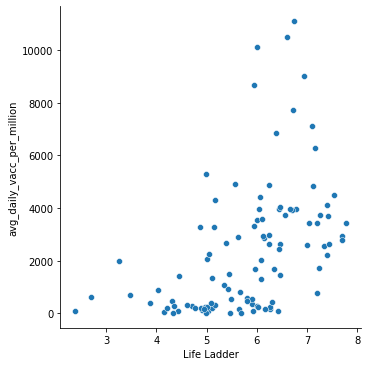

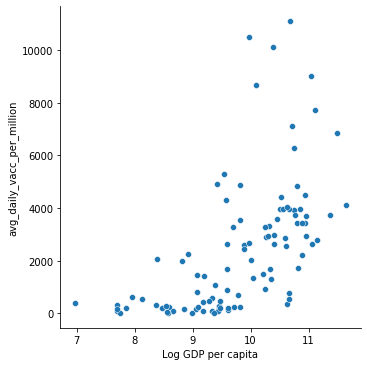

In [92]:
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Life Ladder', y='avg_daily_vacc_per_million')
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Log GDP per capita', y='avg_daily_vacc_per_million')

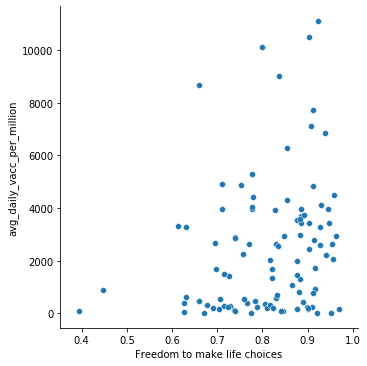

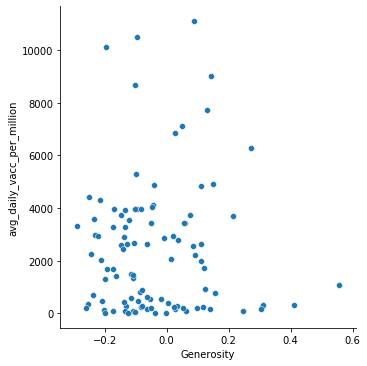

In [93]:
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Freedom to make life choices', y='avg_daily_vacc_per_million')
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Generosity', y='avg_daily_vacc_per_million')

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [199]:
dvdata = hap_vac.dropna(subset=['avg_daily_vacc_per_million']).iloc[:,5:14].dropna()
dvdata_ = dvdata.values
dvdatacols = hap_vac.columns[5:14].values.tolist()
dvdatacols.append(hap_vac.columns[2])
dvtarget = hap_vac.dropna(subset=dvdatacols).iloc[:,2]
dvtarget_ = dvtarget.values
linear_model_dv = LinearRegression()
linear_model_dv.fit(X=dvdata_, y=dvtarget_)

dvresults = pd.DataFrame()
dvresults['country'] = hap_vac.dropna(subset=dvdatacols).iloc[:,3]
dvresults['actual_daily_vac_pm'] = dvtarget
dvresults['predicted_daily_vac_pm'] = linear_model_dv.predict(dvdata_)
print('MSE: ', mean_squared_error(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm']))
print('r^2: ', r2_score(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm']))

MSE:  4029171.6378128505
r^2:  0.32292200829964957


In [200]:
dvresults

,country,actual_daily_vac_pm,predicted_daily_vac_pm
0,Argentina,2022.000000,2821.700687
1,Austria,3452.571429,4017.890762
2,Azerbaijan,4309.142857,1611.200464
4,Belgium,3958.000000,3839.546412
5,Bolivia,813.428571,1717.699204
...,...,...,...
96,Vietnam,10.428571,849.548617
97,Albania,5293.857143,1519.359173
98,Australia,1731.000000,3825.013805
101,Guinea,192.333333,225.259060


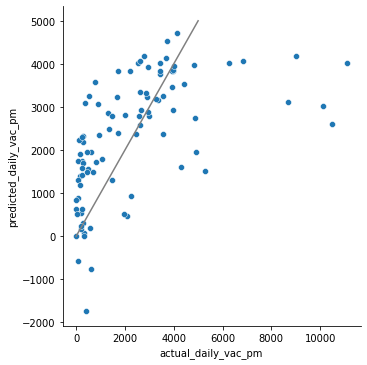

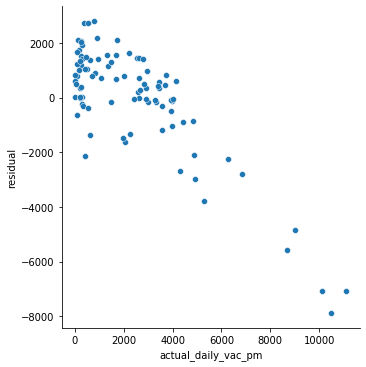

In [213]:
dvresults['residual'] = dvresults['predicted_daily_vac_pm'] -  dvresults['actual_daily_vac_pm']
sns.relplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm')
plt.plot(np.linspace(0,5000,5000),np.linspace(0,5000,5000), color='gray')
sns.relplot(data=dvresults, x='actual_daily_vac_pm', y='residual')

In [202]:
linear_model_dv.coef_

array([ 2.76931041e+02,  1.17432998e+03,  2.39939696e+03, -3.05685173e+00,
       -1.08269076e+03,  3.34116211e+02,  7.15390005e+01, -6.89641253e+02,
        3.24739066e+03])

### Total vaccinations per hundred

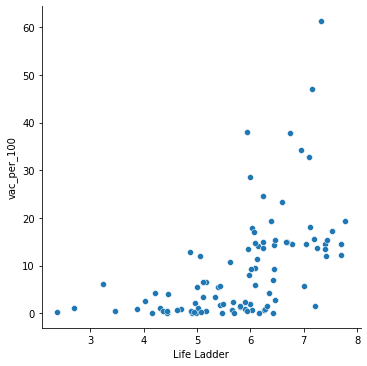

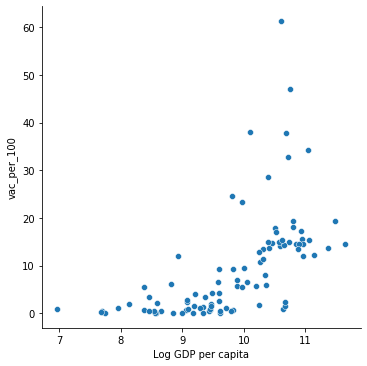

In [94]:
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Life Ladder', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Log GDP per capita', y='vac_per_100')

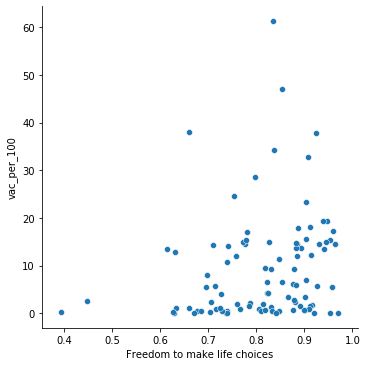

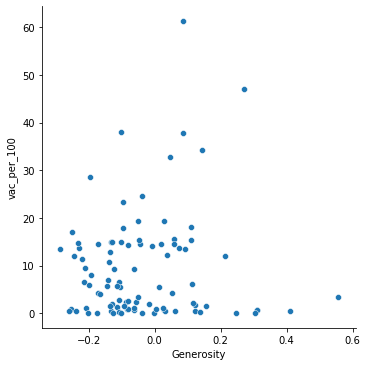

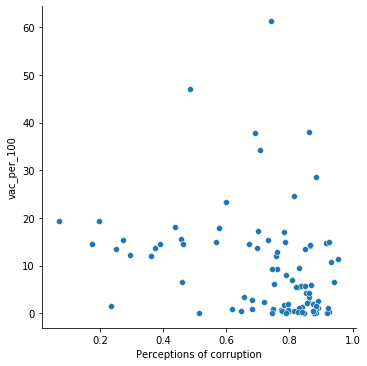

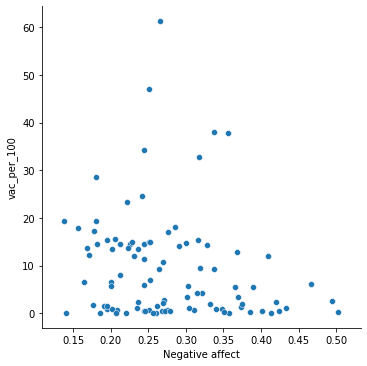

In [99]:
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Freedom to make life choices', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Generosity', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Perceptions of corruption', y='vac_per_100')
#sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Positive affect', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Negative affect', y='vac_per_100')

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [203]:
vdata = hap_vac.dropna(subset=['vac_per_100']).iloc[:,5:].dropna()
vdata_ = vdata.values
vdatacols = hap_vac.columns[5:].values.tolist()
vdatacols.append(hap_vac.columns[1])
vtarget = hap_vac.dropna(subset=vdatacols).iloc[:,1]
vtarget_ = vtarget.values
linear_model_v = LinearRegression()
linear_model_v.fit(X=vdata_, y=vtarget_)

vresults = pd.DataFrame()
vresults['country'] = hap_vac.dropna(subset=vdatacols).iloc[:,3]
vresults['actual_v_per100'] = vtarget
vresults['predicted_v_per100'] = linear_model_v.predict(vdata_)
print('MSE: ', mean_squared_error(vresults['actual_v_per100'], vresults['predicted_v_per100']))
print('r^2: ', r2_score(vresults['actual_v_per100'], vresults['predicted_v_per100']))

MSE:  69.13981340599253
r^2:  0.42557300473089


In [204]:
vresults

,country,actual_v_per100,predicted_v_per100
0,Argentina,9.39,8.640626
1,Austria,15.52,18.282349
2,Azerbaijan,6.63,2.736170
4,Belgium,14.47,16.008791
5,Bolivia,2.42,6.555769
...,...,...,...
91,Senegal,1.95,-0.188196
92,Sri Lanka,4.32,1.124421
93,Uganda,0.31,1.659425
94,Uzbekistan,0.10,5.777686


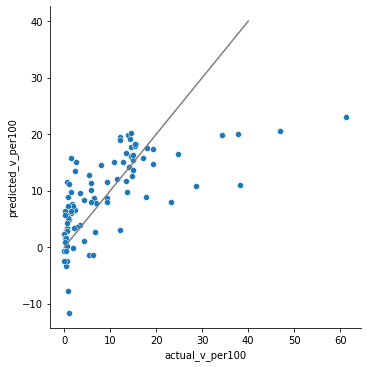

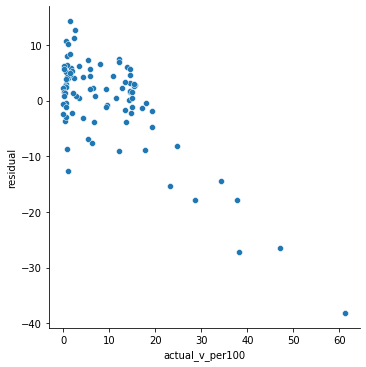

In [217]:
vresults['residual'] = vresults['predicted_v_per100'] -  vresults['actual_v_per100']
sns.relplot(data=vresults, x='actual_v_per100', y='predicted_v_per100')
plt.plot(np.linspace(0,40,5000),np.linspace(0,40,5000), color='gray')

sns.relplot(data=vresults, x='actual_v_per100', y='residual')

In [206]:
linear_model_v.coef_

array([  4.20987899,   4.62809273,   7.10323979,  -0.0584833 ,
        -4.33681356,  11.43743181,   4.73334542, -22.19423554,
        14.95128661])